In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import spacy
from spacy import displacy
import pytesseract
from pytesseract import Output
import matplotlib.pyplot as plt
pytesseract.pytesseract.tesseract_cmd="/home/aman/anaconda3/envs/tallyInvoiceParser.env/bin/tesseract"
os.environ['TESSDATA_PREFIX'] = "/home/aman/anaconda3/envs/tallyInvoiceParser.env/share/tessdata"
os.environ['MLIR_CRASH_REPRODUCER_DIRECTORY']='tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269'
import import_ipynb
from textPreProcessor import *
from imagePreProcessor import *
from datetime import datetime
import math
from sklearn.model_selection import train_test_split
import keras
from keras import models
from keras.models import Sequential
from keras.layers import Dense, ReLU, activation, Dropout
import tensorflow as tf

2023-06-08 15:15:57.988614: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


importing Jupyter notebook from textPreProcessor.ipynb
Original Date ----> After Processing 

5/12/22      ---->      5-12-2022
2/2/2023      ---->      2-2-2023
5:12-2023      ---->      5-12-2023
5,May,2023      ---->      5-05-2023
5 May,2023      ---->      5-05-2023
October 24,2022      ---->      10-24-2022
importing Jupyter notebook from imagePreProcessor.ipynb


In [2]:
pwd

'/home/aman/Documents/Tally/DocumentAI/Code/Tesseract-Model'

In [3]:
os.chdir('/home/aman/Documents/Tally/DocumentAI/Data/Dataset/')

In [4]:
df = pd.read_csv("tesseract.csv")

In [5]:
df.head()

,Unnamed: 0,block_num,par_num,line_num,word_num,left,top,width,height,conf,...,delivery,order,due,payment,tax,bill,receipt,issue,imageName,output
0,0,8,1,1,6,1343,520,150,23,67.342278,...,0,0,0,0,0,0,0,0,20.jpeg,1
1,1,15,1,2,3,1411,171,100,19,56.832672,...,0,0,0,0,1,0,0,0,23.jpeg,1
2,2,9,3,1,3,588,1037,84,19,94.234421,...,0,0,0,0,0,0,0,0,18.jpeg,0
3,3,9,3,1,4,745,1031,88,32,84.635925,...,0,0,0,0,0,0,0,0,18.jpeg,0
4,4,6,1,1,2,451,289,112,23,92.698341,...,0,0,0,0,0,0,0,0,22.jpeg,1


In [6]:
def preProcess(df):
    colsToDrop = ["Unnamed: 0", "left", "top", "width", "height", "imageName", "text"]
    df.drop(columns=colsToDrop, inplace=True)
    df["conf"]=df["conf"]/100
    df["x"]=df["x"]/1000
    df["y"]=df["y"]/1000

In [7]:
preProcess(df)

In [8]:
df.head()

,block_num,par_num,line_num,word_num,conf,x,y,date,dated,invoice,delivery,order,due,payment,tax,bill,receipt,issue,output
0,8,1,1,6,0.673423,1.493,0.543,0,0,0,0,0,0,0,0,0,0,0,1
1,15,1,2,3,0.568327,1.511,0.190,0,0,0,0,0,0,0,1,0,0,0,1
2,9,3,1,3,0.942344,0.672,1.056,0,0,0,0,0,0,0,0,0,0,0,0
3,9,3,1,4,0.846359,0.833,1.063,0,0,0,0,0,0,0,0,0,0,0,0
4,6,1,1,2,0.926983,0.563,0.312,0,0,0,0,0,0,0,0,0,0,0,1


In [9]:
df.shape

(36, 19)

In [10]:
def extractData(df):
    train, test = train_test_split(df, test_size=0.2, random_state=42, shuffle=True)
    xTrain = train.drop(columns=["output"]).to_numpy()
    xTest = test.drop(columns=["output"]).to_numpy()
    yTrain = train["output"].to_numpy()
    yTest = test["output"].to_numpy()
    return xTrain, yTrain, xTest, yTest

In [11]:
xTrain, yTrain, xTest, yTest = extractData(df)

In [12]:
xTrain.shape

(28, 18)

In [13]:
xTest.shape

(8, 18)

In [14]:
yTrain.shape

(28,)

In [15]:
type(xTrain)

numpy.ndarray

In [16]:
type(yTrain)

numpy.ndarray

In [17]:
model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(18, ), activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                1216      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,329
Trainable params: 3,329
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=["accuracy", 'Precision', "Recall", "TruePositives", "TrueNegatives", "FalsePositives", "FalseNegatives"])

In [20]:
history = model.fit(xTrain, yTrain,
          epochs=100, batch_size=1)

Epoch 1/100
28/28 [==============================] - 1s 1ms/step - loss: 0.8259 - accuracy: 0.2500 - precision: 0.2222 - recall: 0.1250 - true_positives: 2.0000 - true_negatives: 5.0000 - false_positives: 7.0000 - false_negatives: 14.0000        
Epoch 2/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6757 - accuracy: 0.6429 - precision: 0.6154 - recall: 1.0000 - true_positives: 16.0000 - true_negatives: 2.0000 - false_positives: 10.0000 - false_negatives: 0.0000e+00  
Epoch 3/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6253 - accuracy: 0.7143 - precision: 0.7000 - recall: 0.8750 - true_positives: 14.0000 - true_negatives: 6.0000 - false_positives: 6.0000 - false_negatives: 2.0000       
Epoch 4/100
28/28 [==============================] - 0s 1ms/step - loss: 0.6223 - accuracy: 0.7143 - precision: 0.7500 - recall: 0.7500 - true_positives: 12.0000 - true_negatives: 8.0000 - false_positives: 4.0000 - false_negatives: 4.0000                   
Epo

28/28 [==============================] - 0s 1ms/step - loss: 0.3545 - accuracy: 0.8571 - precision: 0.8333 - recall: 0.9375 - true_positives: 15.0000 - true_negatives: 9.0000 - false_positives: 3.0000 - false_negatives: 1.0000       
Epoch 34/100
28/28 [==============================] - 0s 1ms/step - loss: 0.3504 - accuracy: 0.8571 - precision: 0.9286 - recall: 0.8125 - true_positives: 13.0000 - true_negatives: 11.0000 - false_positives: 1.0000 - false_negatives: 3.0000              
Epoch 35/100
28/28 [==============================] - 0s 995us/step - loss: 0.3360 - accuracy: 0.8929 - precision: 0.9333 - recall: 0.8750 - true_positives: 14.0000 - true_negatives: 11.0000 - false_positives: 1.0000 - false_negatives: 2.0000            
Epoch 36/100
28/28 [==============================] - 0s 1ms/step - loss: 0.3375 - accuracy: 0.8929 - precision: 0.8824 - recall: 0.9375 - true_positives: 15.0000 - true_negatives: 10.0000 - false_positives: 2.0000 - false_negatives: 1.0000      
Epoch 37/

28/28 [==============================] - 0s 1ms/step - loss: 0.2797 - accuracy: 0.8571 - precision: 0.9286 - recall: 0.8125 - true_positives: 13.0000 - true_negatives: 11.0000 - false_positives: 1.0000 - false_negatives: 3.0000      
Epoch 66/100
28/28 [==============================] - 0s 1ms/step - loss: 0.2492 - accuracy: 0.8571 - precision: 0.9286 - recall: 0.8125 - true_positives: 13.0000 - true_negatives: 11.0000 - false_positives: 1.0000 - false_negatives: 3.0000      
Epoch 67/100
28/28 [==============================] - 0s 1ms/step - loss: 0.2627 - accuracy: 0.8929 - precision: 0.9333 - recall: 0.8750 - true_positives: 14.0000 - true_negatives: 11.0000 - false_positives: 1.0000 - false_negatives: 2.0000                  
Epoch 68/100
28/28 [==============================] - 0s 1ms/step - loss: 0.2401 - accuracy: 0.9286 - precision: 1.0000 - recall: 0.8750 - true_positives: 14.0000 - true_negatives: 12.0000 - false_positives: 0.0000e+00 - false_negatives: 2.0000      
Epoch 69/

28/28 [==============================] - 0s 1ms/step - loss: 0.2104 - accuracy: 0.8929 - precision: 0.9333 - recall: 0.8750 - true_positives: 14.0000 - true_negatives: 11.0000 - false_positives: 1.0000 - false_negatives: 2.0000      
Epoch 98/100
28/28 [==============================] - 0s 989us/step - loss: 0.2000 - accuracy: 0.8929 - precision: 0.8824 - recall: 0.9375 - true_positives: 15.0000 - true_negatives: 10.0000 - false_positives: 2.0000 - false_negatives: 1.0000    
Epoch 99/100
28/28 [==============================] - 0s 994us/step - loss: 0.1860 - accuracy: 0.8929 - precision: 0.9333 - recall: 0.8750 - true_positives: 14.0000 - true_negatives: 11.0000 - false_positives: 1.0000 - false_negatives: 2.0000    
Epoch 100/100
28/28 [==============================] - 0s 1ms/step - loss: 0.1829 - accuracy: 0.9643 - precision: 1.0000 - recall: 0.9375 - true_positives: 15.0000 - true_negatives: 12.0000 - false_positives: 0.0000e+00 - false_negatives: 1.0000  


Text(0.5, 0, 'epoch')

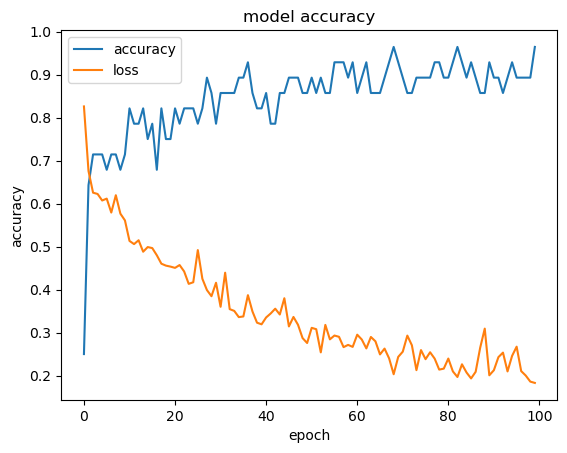

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('model accuracy')
plt.legend(["accuracy", "loss"])
plt.ylabel('accuracy')
plt.xlabel('epoch')

In [23]:
model.evaluate(xTest, yTest)

1/1 [==============================] - 0s 24ms/step - loss: 0.2701 - accuracy: 0.8750 - precision: 0.8000 - recall: 1.0000 - true_positives: 4.0000 - true_negatives: 3.0000 - false_positives: 1.0000 - false_negatives: 0.0000e+00


[0.27011382579803467, 0.875, 0.800000011920929, 1.0, 4.0, 3.0, 1.0, 0.0]

In [25]:
pwd

'/home/aman/Documents/Tally/DocumentAI/Data/Dataset'

In [26]:
os.chdir('/home/aman/Documents/Tally/DocumentAI/Code/Tesseract-Model/Models/')

In [27]:
model.save("tesseractv1.h5")